In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import sys
sys.path.append("../../../")
import numpy as np

In [4]:
#the point of this file is to recreate the experiments I did for the micro revision. 
#however, for micro revision I actually ended up using the old notebook in the transpiler repo because the code ran faster... :/

In [5]:
from src.utils.custom_gates import RiSwapGate
from src.basis import CircuitTemplate
from src.cost_function import BasicCost as Cost
from src.optimizer import TemplateOptimizer

In [6]:
#important to change 
from src.sampler import Haar3Sample, Haar2Sample, HaarSample

In [7]:
n_data = []
n_range = range(2,6)
template_range = range(2,4)
n_samples = 3

total = n_samples*len(template_range)*len(n_range)
count = 0
for haar_sol in [HaarSample]:
    HaarSample = haar_sol
    data_temp_temp = []
    for n in n_range:
        data_temp = []
        for template_size in template_range:
            basis = CircuitTemplate(base_gates=[RiSwapGate(1/n)], preseed=False, use_polytopes=False, no_exterior_1q=False)
            basis.spanning_range = range(template_size,template_size+1)

            objective = Cost()

            optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=False, override_fail=True)

            sampler = HaarSample(n_samples=n_samples)
            ret = optimizer.approximate_from_distribution(sampler=sampler)

            count+=n_samples
            print(count/total)
        
            data_temp.append(ret[0])
        data_temp_temp.append(data_temp)
    n_data.append(data_temp_temp)

0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0


In [8]:
n_data

[[[[1.878561750601193e-10, 0.014516966721496605, 0.015041804164534378],
   [1.669611116028591e-10, 2.406472798810455e-10, 1.5446555146070295e-10]],
  [[0.005185092148997983, 5.216804765950656e-10, 0.056295878650543196],
   [4.821341104133126e-10, 1.1416156908694575e-10, 1.0693330665390022e-09]],
  [[0.03687301312492619, 0.1293215923650095, 0.10361860895570163],
   [0.01052696190313096, 7.200351426206453e-11, 0.021051353321229538]],
  [[0.24817634883493378, 0.3161058682643163, 0.28558128852276066],
   [0.05150486909990826, 0.023389015535941304, 0.0010852380721779742]]]]

In [11]:
np.array(n_data).mean(axis=3)[0]
#np.std(np.array(n_data), axis=3)

array([[9.85292369e-03, 1.87357981e-10],
       [2.04936571e-02, 5.55209582e-10],
       [8.99377381e-02, 1.05261051e-02],
       [2.83287835e-01, 2.53263742e-02]])

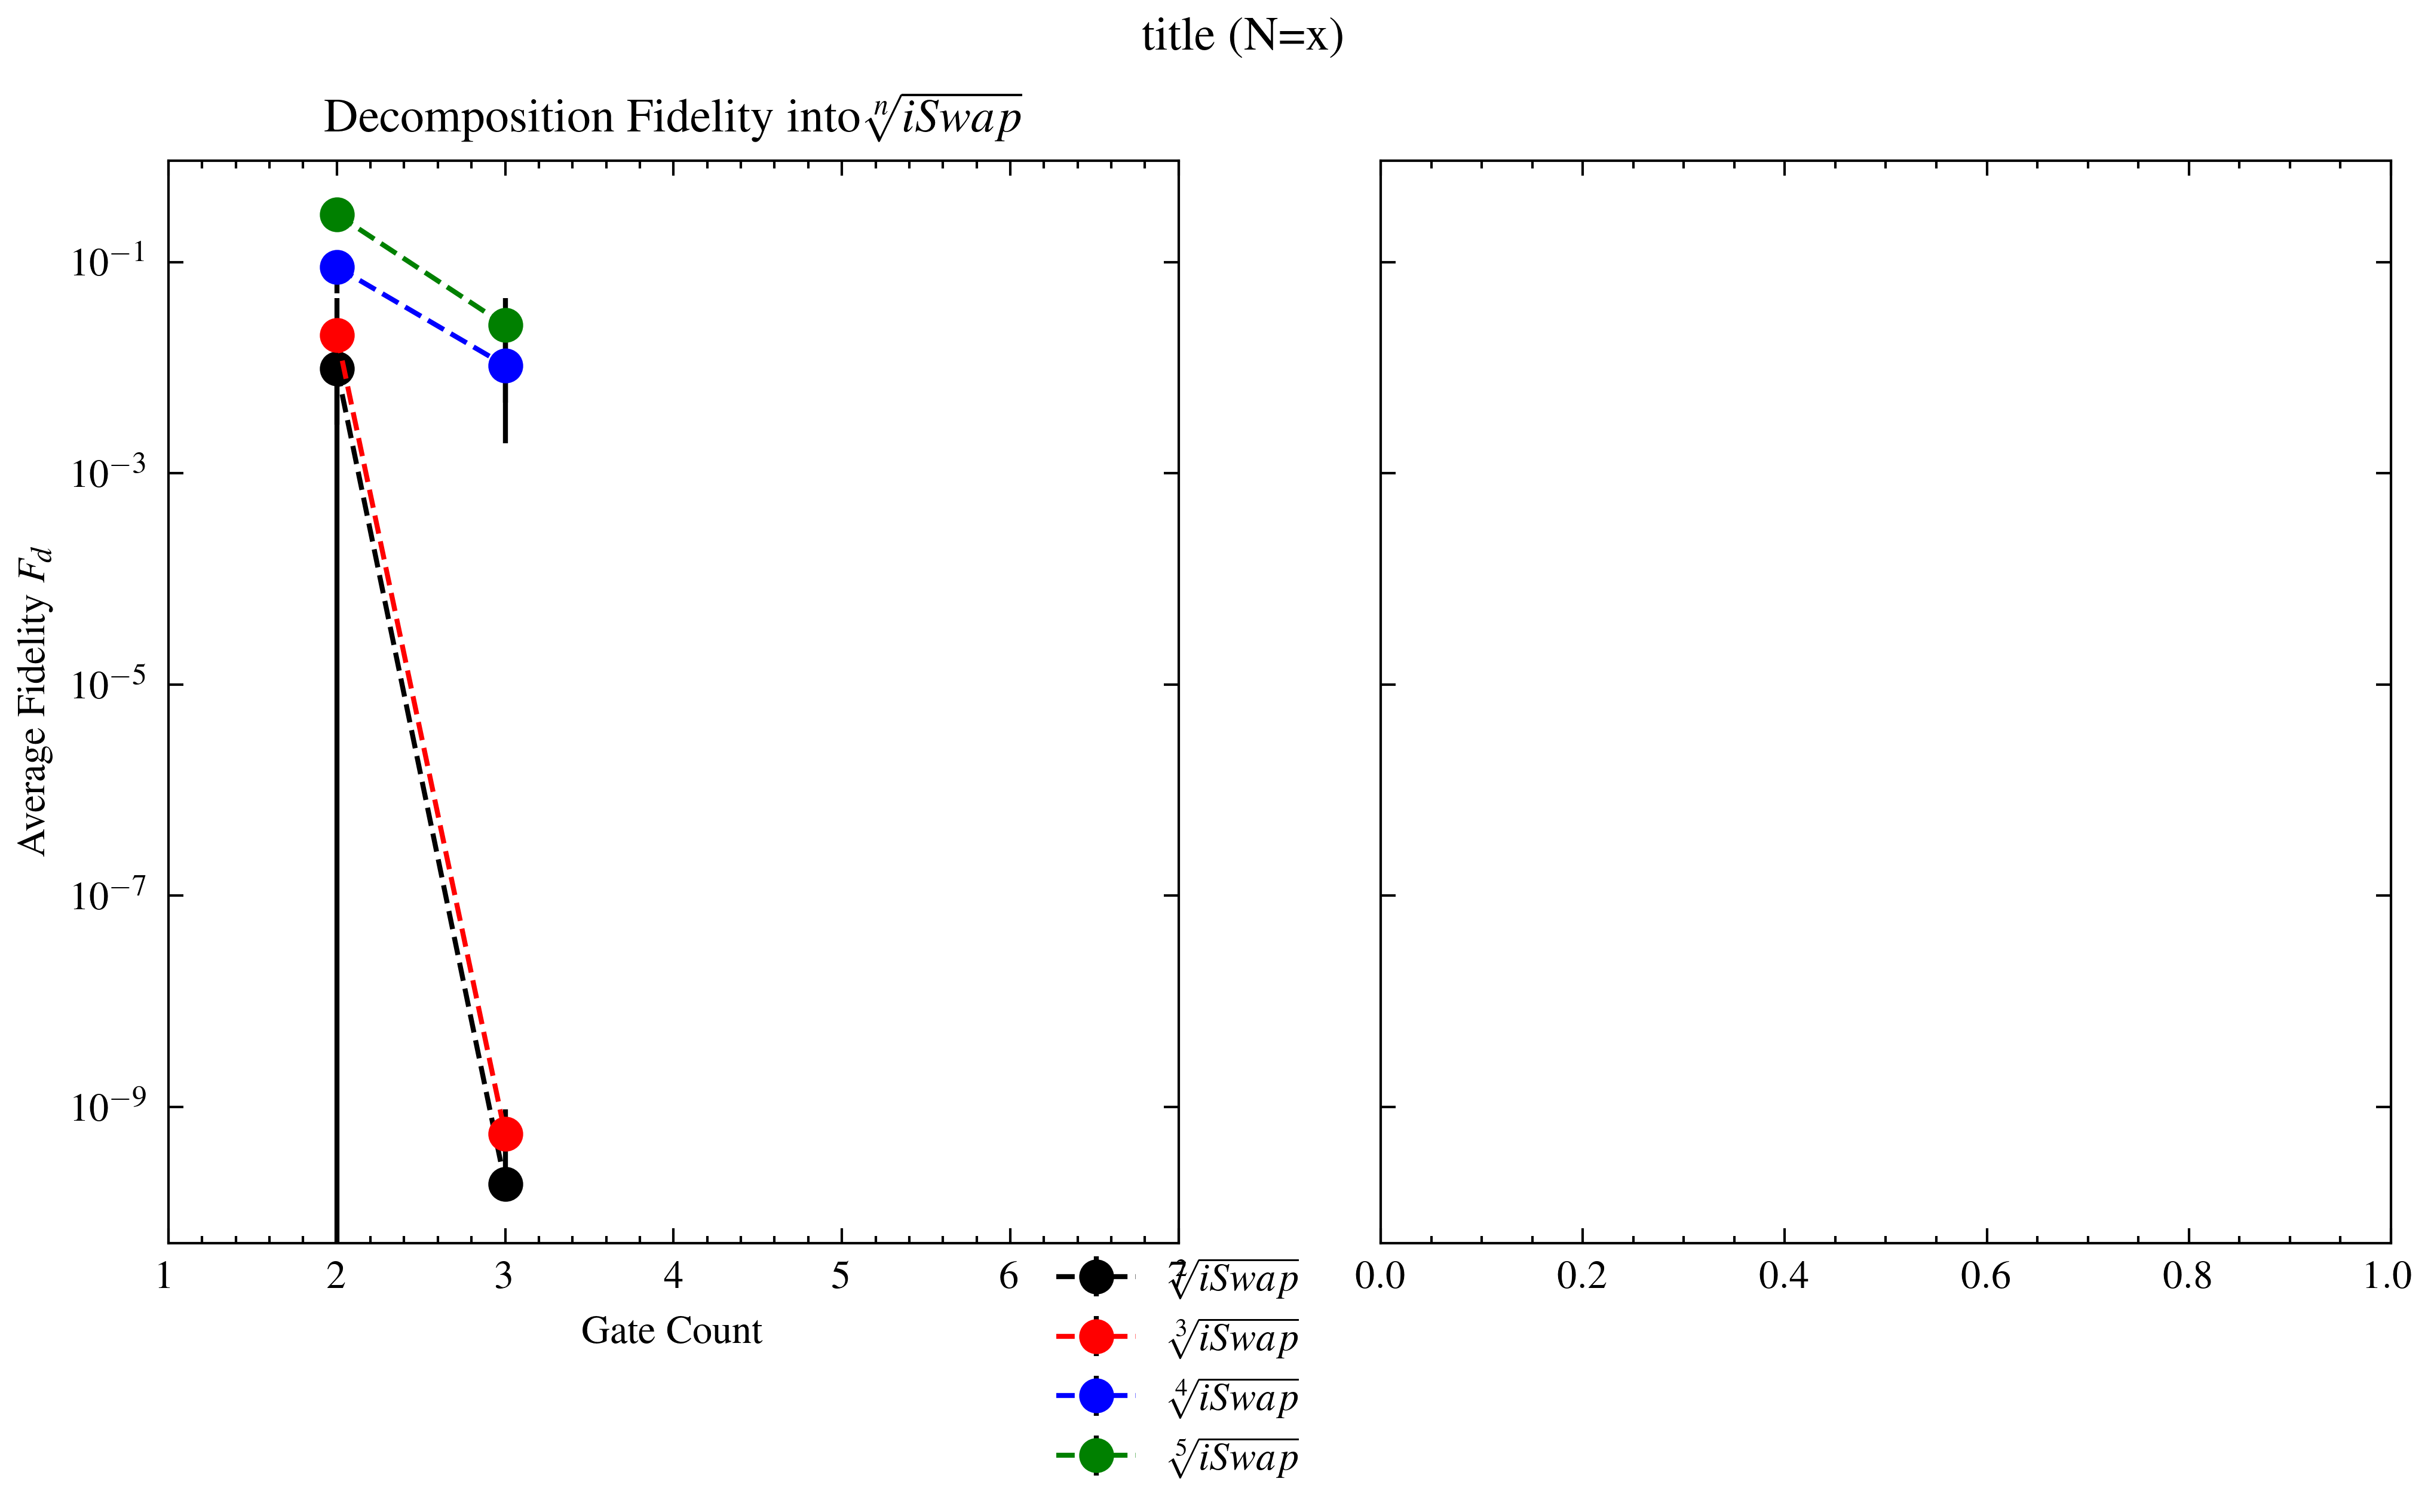

In [23]:
import matplotlib.pyplot as plt
plt.style.use(['science'])#, 'ieee'])
plt.close()
fig,axs = plt.subplots(1,2, sharey=True, figsize=(8,4))

for h_i in [0]:
    for i,n in enumerate(n_range):
        axs[h_i].errorbar(template_range, np.array(n_data).mean(axis=3)[h_i][i], yerr=np.std(np.array(n_data), axis=3)[h_i][i], marker='o', linestyle='--', ecolor='black', label=RiSwapGate.latex_string([1/n]))
        axs[h_i].set_yscale('log')
        axs[h_i].set_xlabel("Gate Count")
        if h_i == 0:
            axs[0].set_ylabel(r"Average Fidelity $F_d$")
axs[0].legend(bbox_to_anchor=(1, -.25), loc='lower center')
axs[0].set_title("Decomposition Fidelity into" + RiSwapGate.latex_string())
fig.suptitle("title (N=x)")
axs[0].set_xticks(range(1,8))